In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from keras import models, layers, optimizers, losses, metrics

In [2]:
training = pd.read_csv('input/train.csv')
testing = pd.read_csv('input/test.csv')

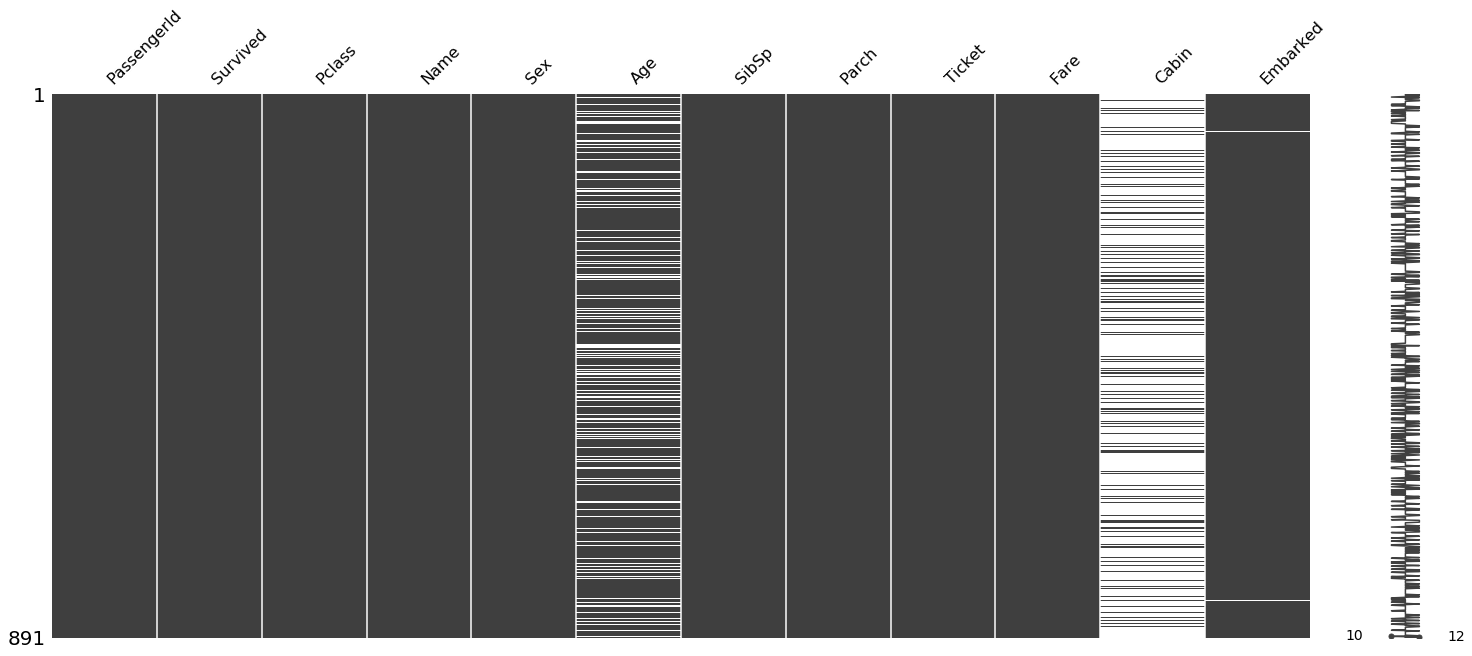

In [5]:
msno.matrix(training)

In [4]:
training.shape

(891, 12)

In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
training.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# training.drop(labels=['Ticket', 'Cabin'], axis='columns', inplace=True)
# testing.drop(labels=['Ticket', 'Cabin'], axis='columns', inplace=True)

# inplace : True = 그냥 함수 쓰듯이 바로 제거 (리턴값 없음), False = 새로운 데이터프레임에 결과값 넣을 때 사용 (리턴값이 결과 데이터프레임)

training.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
testing.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

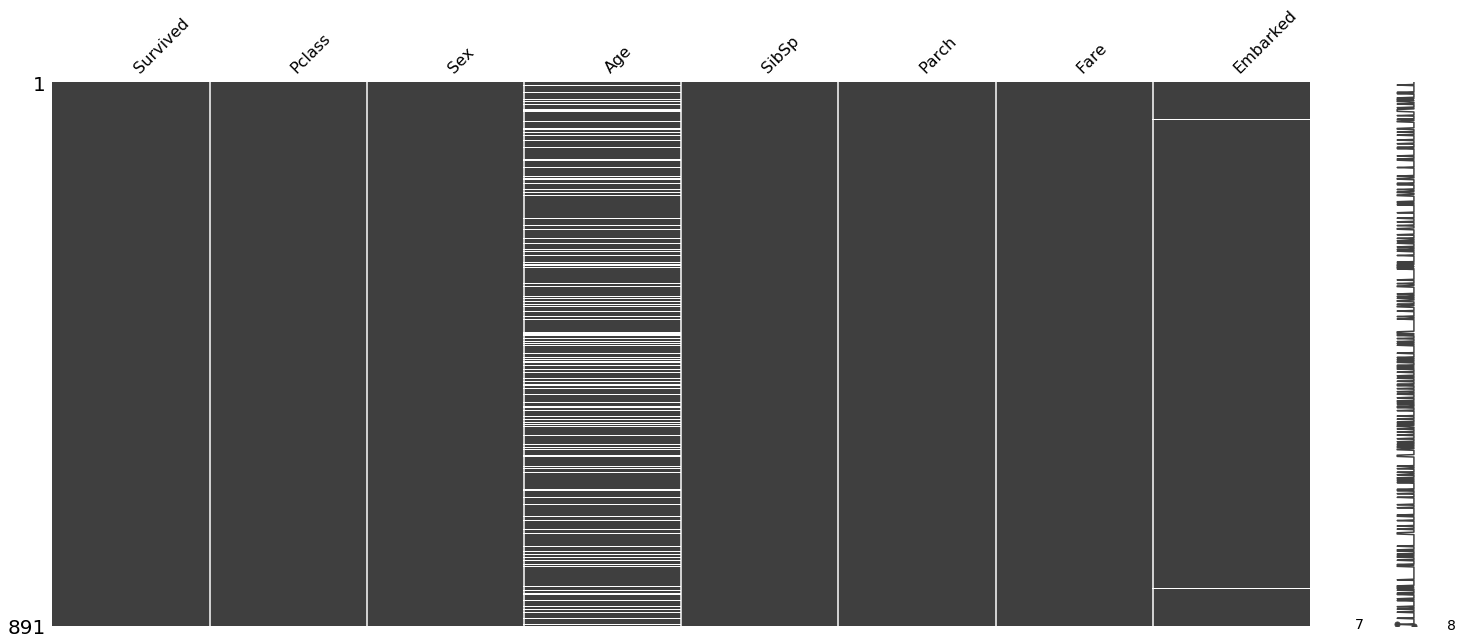

In [11]:
msno.matrix(training)

In [13]:
print(training.isnull().sum())
print()
print(testing.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [14]:
training['Age'].fillna(training['Age'].mean(), inplace=True)
testing['Age'].fillna(testing['Age'].mean(), inplace=True)

training['Embarked'].fillna('S', inplace=True)

testing['Fare'].fillna(testing['Fare'].mean(), inplace=True)

print(training.isnull().sum())
print()
print(testing.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [17]:
training.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
testing.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [19]:
training.loc[training['Sex'] == 'male', 'Sex'] = 0
training.loc[training['Sex'] == 'female', 'Sex'] = 1

training.loc[training['Embarked'] == 'S', 'Embarked'] = 0
training.loc[training['Embarked'] == 'C', 'Embarked'] = 1
training.loc[training['Embarked'] == 'Q', 'Embarked'] = 2

testing.loc[testing['Sex'] == 'male', 'Sex'] = 0
testing.loc[testing['Sex'] == 'female', 'Sex'] = 1

testing.loc[testing['Embarked'] == 'S', 'Embarked'] = 0
testing.loc[testing['Embarked'] == 'C', 'Embarked'] = 1
testing.loc[testing['Embarked'] == 'Q', 'Embarked'] = 2

In [21]:
training.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [22]:
testing.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [23]:
training['FamSize'] = training['SibSp'] + training['Parch'] + 1
testing['FamSize'] = testing['SibSp'] + testing['Parch'] + 1

In [24]:
training['IsAlone'] = training['FamSize'].apply(lambda x: 1 if x == 1 else 0)
testing['IsAlone'] = testing['FamSize'].apply(lambda x: 1 if x == 1 else 0)

In [25]:
testing.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
0,3,0,34.5,0,0,7.8292,2,1,1
1,3,1,47.0,1,0,7.0000,0,2,0
2,2,0,62.0,0,0,9.6875,2,1,1
3,3,0,27.0,0,0,8.6625,0,1,1
4,3,1,22.0,1,1,12.2875,0,3,0


In [26]:
# ==============================================================================================================================

In [78]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(9,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adagrad(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [79]:
x_train = training.drop(columns=['Survived'])
y_train = training['Survived']
x_test = testing.copy()

print(x_train.keys())
print(y_train.keys())
print(x_test.keys())

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamSize',
       'IsAlone'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamSize',
       'IsAlone'],
      dtype='object')


In [81]:
fit_history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, shuffle=True, verbose=2)

Train on 712 samples, validate on 179 samples
Epoch 1/100
 - 0s - loss: 0.4379 - binary_accuracy: 0.8090 - val_loss: 0.3824 - val_binary_accuracy: 0.8324
Epoch 2/100
 - 0s - loss: 0.4374 - binary_accuracy: 0.8020 - val_loss: 0.3834 - val_binary_accuracy: 0.8380
Epoch 3/100
 - 0s - loss: 0.4398 - binary_accuracy: 0.8034 - val_loss: 0.3738 - val_binary_accuracy: 0.8380
Epoch 4/100
 - 0s - loss: 0.4413 - binary_accuracy: 0.8090 - val_loss: 0.5406 - val_binary_accuracy: 0.7263
Epoch 5/100
 - 0s - loss: 0.4530 - binary_accuracy: 0.8034 - val_loss: 0.5307 - val_binary_accuracy: 0.7151
Epoch 6/100
 - 0s - loss: 0.4555 - binary_accuracy: 0.7963 - val_loss: 0.3851 - val_binary_accuracy: 0.8212
Epoch 7/100
 - 0s - loss: 0.4356 - binary_accuracy: 0.8104 - val_loss: 0.3875 - val_binary_accuracy: 0.8156
Epoch 8/100
 - 0s - loss: 0.4370 - binary_accuracy: 0.8020 - val_loss: 0.3876 - val_binary_accuracy: 0.8101
Epoch 9/100
 - 0s - loss: 0.4322 - binary_accuracy: 0.8076 - val_loss: 0.4248 - val_binary

In [82]:
predictions = model.predict_classes(x_test)

In [83]:
output = pd.DataFrame(data=predictions, columns=['Survived'])
output.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [84]:
output.to_csv('output.csv', index=False)